In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from modules import *
from sim import *


In [25]:
sim = Sim(3, "alpha_eps1p0", "data_d41_l1_b2.npz", epsilon_SF=None)


Moving to directory '/home/za9132/scratch/romain/round3/alpha_eps1p0'.


### quicklook

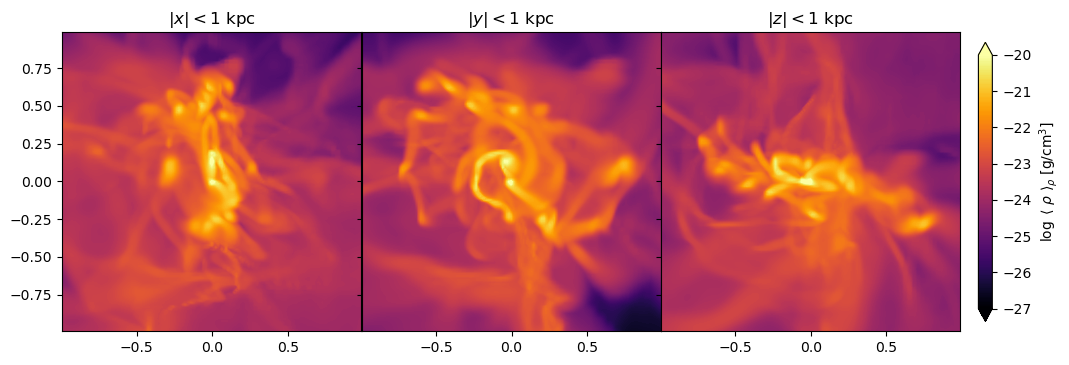

In [4]:
kwargs = {
    "field": "density",
    "extrema": (1e-27, 1e-20),
    "avg": True,
    "project": True,
    "slice": Arglist([[X, Y, Z]]),
    "title": Arglist([[r"$|x| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|y| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|z| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc)]]),
    "do_log": True,
    "cmap": 'inferno',
    "cbar_tick_increment": 1.,
    "cbar_label": r'$\log~\langle~\rho~\rangle_\rho$ [${\rm g/cm^{3}}$]'
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True, share_cbar=True, do_axes_labels=False)


Text(0.5, 1.02, '$\\varepsilon_{\\rm SF} = 1.0$\n$|z| < 1~{\\rm kpc}$')

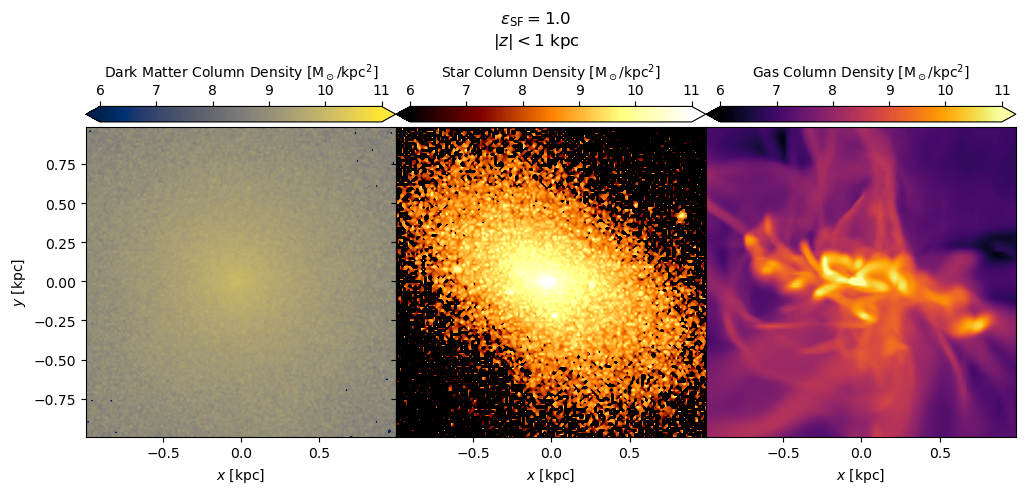

In [12]:
slice = Z
slice_label = ["x", "y", "z"][slice]

kwargs = {
    "field": Arglist([["density_dm", "density_star", "density"]]),
    "unit": const.M_sol / const.kpc**2,
    "extrema": (1e6, 1e11),
    "avg": False,
    "project": True,
    "slice": slice,
    "do_log": True,
    "cmap": Arglist([['cividis', 'afmhot', 'inferno']]),
    "cbar_tick_increment": 1.,
    "cbar_label": Arglist([[
        r'Dark Matter Column Density [${\rm M_\odot / kpc^2}$]',
        r'Star Column Density [${\rm M_\odot / kpc^2}$]',
        r'Gas Column Density [${\rm M_\odot / kpc^2}$]'
    ]]),
    "cbar_orientation": "horizontal",
    "max_pixels": 256
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True)

plt.suptitle(sim.sim_latex + "\n" + r'$|%s| < %.3g~{\rm kpc}$' % (slice_label, sim.box_size/2/const.kpc), y=1.02)

# sim.save_fig("all-density-%s" % slice_label)


<Axes: title={'center': '$|z| < 1~{\\rm kpc}$'}, xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

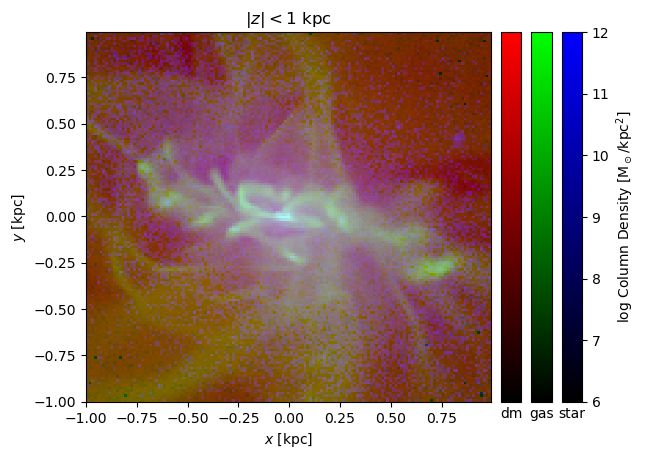

In [5]:
slice = Z
slice_label = ["x", "y", "z"][slice]
coord1_idx, coord2_idx = np.sort([(slice + 1) % 3, (slice + 2) % 3])

sim.plot("density_dm", "density", "density_star", (1e6, 1e12), unit=const.M_sol/const.kpc**2, xlabels=["dm", "gas", "star"], plot_type='rgb_slice', slice=slice, title=r'$|%s| < 1~{\rm kpc}$' % slice_label, project=True, do_log=True, avg=False, cbar_label=r'log Column Density [${\rm M_\odot / kpc^2}$]', cbar_tick_increment=1.)

# sim.save_fig("denisty-rgb-proj-%s" % slice_label)


### column density

In [126]:
density_sph = sim.interp_to_sph(sim.density)
col_density = np.sum(density_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

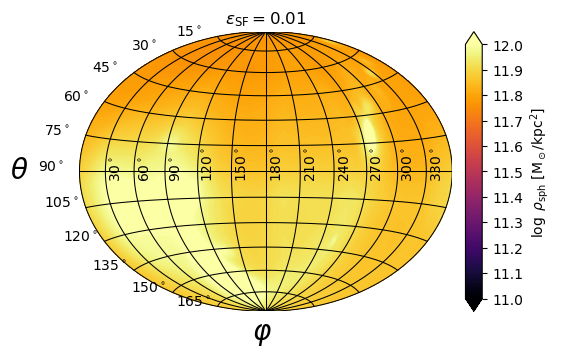

In [127]:
sim.plot(col_density, (10**(11), 10**(12)), unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm sph}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex, plot_type='AH') 

# sim.save_fig("dust-sph")


In [128]:
density_dust_sph = sim.interp_to_sph(sim.density_dust)
col_density_dust = np.sum(density_dust_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

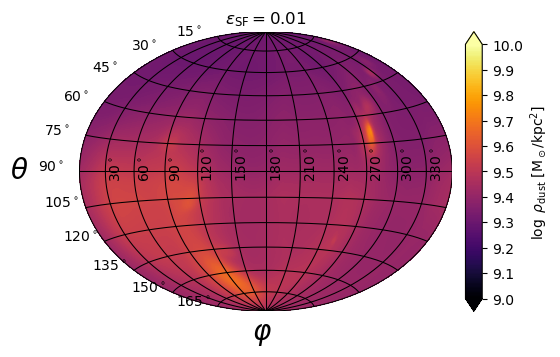

In [132]:
sim.plot(col_density_dust, (10**(9), 10**(10)), plot_type='AH', unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm dust}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex) 
    
# sim.save_fig("dust-sph")


### SFR

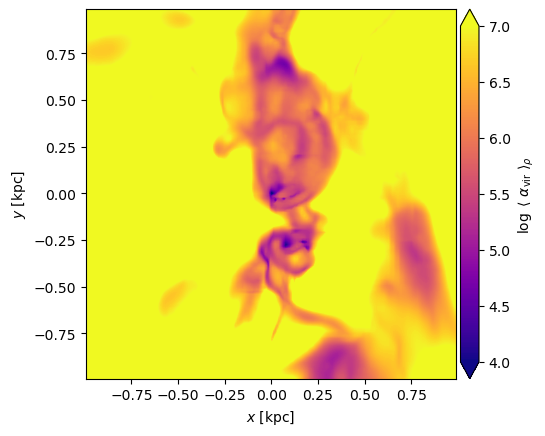

In [25]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.alpha_vir, (1e4, 1e7), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\alpha_{\rm vir}~\rangle_\rho$', cbar_tick_increment=0.5, isocontours=[sim.alpha_vir_crit])

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


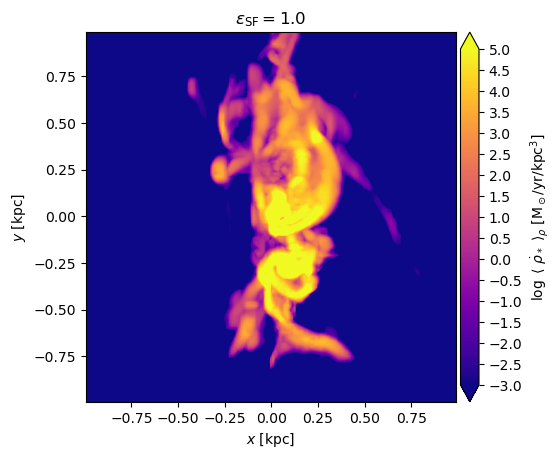

In [8]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.SFR_density / (const.M_sol / const.yr / const.kpc**3), (1e-3, 1e5), title=r'$\varepsilon_{\rm SF} = 1.0$', avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\dot{\rho}_*~\rangle_\rho$ [${\rm M_\odot/yr/kpc^3}$]', cbar_tick_increment=0.5)

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


### gas properties

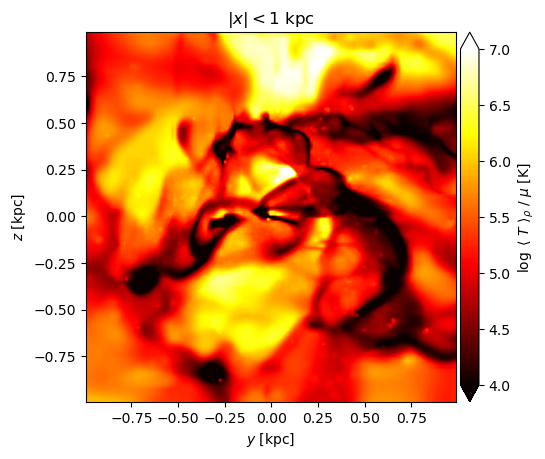

In [33]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.temp, (1e4, 1e7), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='hot', cbar_label=r'$\log~\langle~T~\rangle_\rho~/~\mu$ [K]', cbar_tick_increment=0.5)

# sim.save_fig("temp-proj-%s" % slice_label)


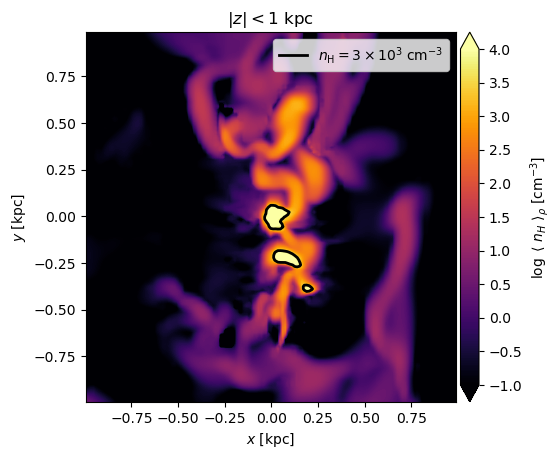

In [44]:
slice = Z
slice_label = ["x", "y", "z"][slice]

n_H_crit_ffb = 3e3
cond_ffb = sim.n_H < n_H_crit_ffb

ax = sim.plot(sim.n_H, (1e-1, 1e4), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight="density", project=False, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~n_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5, isocontours=[n_H_crit_ffb])

custom_lines = [Line2D([0], [0], color='black', lw=2)]
ax.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


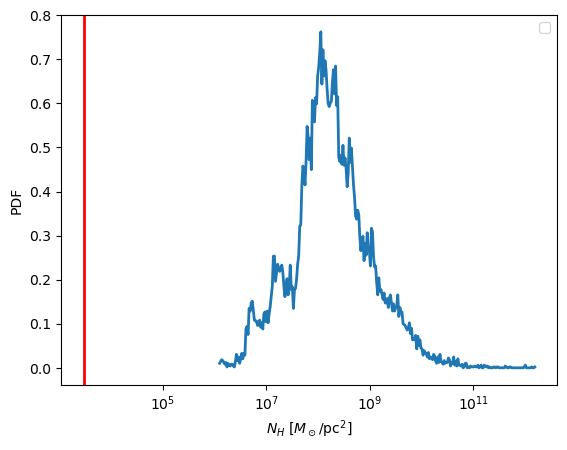

In [119]:
nbins = 300
Sigma_ffb = 3e3 * const.M_sol / const.pc**2
unit = const.M_sol / const.pc**2

for slice in [X]:

    N_H = np.sum(sim.density * sim.length_unit, axis=slice)

    hist, bins = np.histogram(np.log10(N_H), weights=None, bins=nbins)
    N_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
    pixel_1d = hist
    pixel_pdf_1d = pixel_1d / np.sum(pixel_1d) / np.diff(bins)[0]
    plt.plot(N_H_1d / unit, pixel_pdf_1d, lw=2)

plt.legend()
plt.xscale('log')
plt.xlabel(r'$N_H$ [$M_\odot / {\rm pc^2}$]')
plt.ylabel(r'PDF')

plt.axvline(x=Sigma_ffb/unit, color='red', lw=2)

# save_fig("star-density-pdf", subdir=os.path.join("round%d" % sim_round, sim_name))



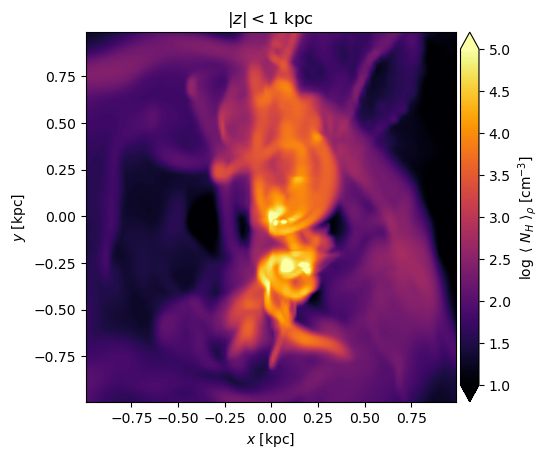

In [87]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.density, (1e1, 1e5), unit=(const.M_sol / const.pc**2), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=False, slice=slice, do_integrate=True, project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~N_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)

#custom_lines = [Line2D([0], [0], color='black', lw=2)]
#ax.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


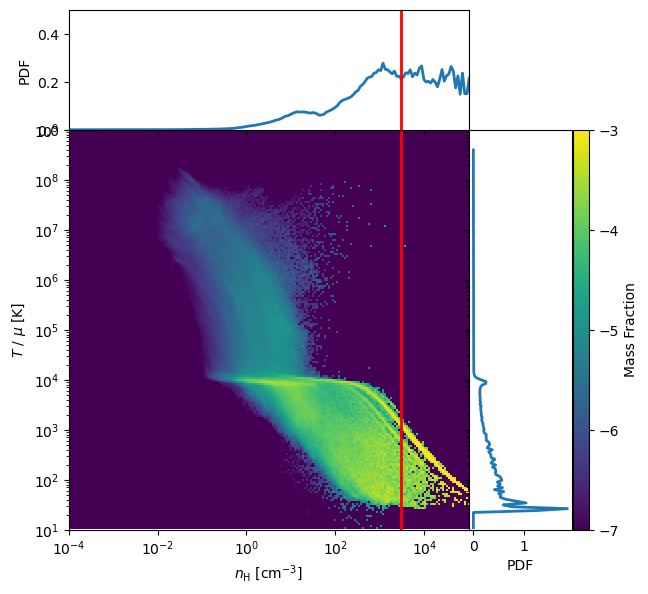

In [152]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
temp_extrema = (1e1, 1e9)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, temperature_2d, mass_2d = sim.calc_phase(sim.n_H, sim.temp, n_H_extrema, temp_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$T~/~\mu$ [K]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(temp_extrema[0], temp_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.temp).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
temp_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, temp_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


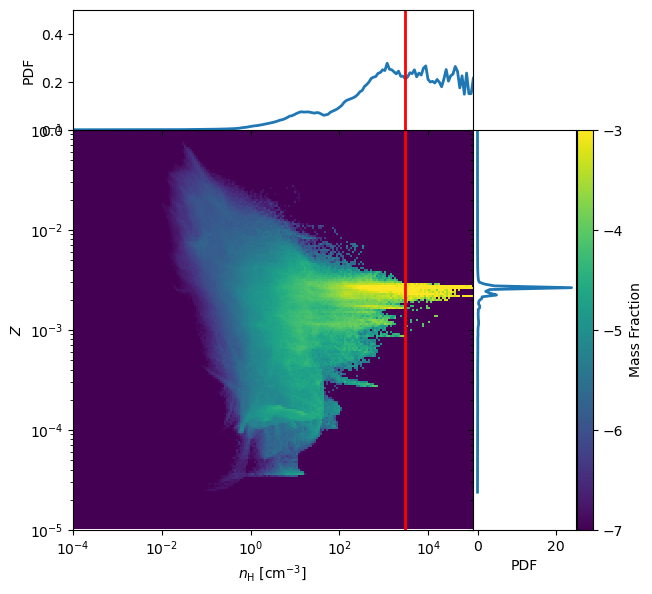

In [153]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
metallicity_extrema = (1e-5, 1e-1)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, metallicity_2d, mass_2d = sim.calc_phase(sim.n_H, sim.metallicity, n_H_extrema, metallicity_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, metallicity_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$Z$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(metallicity_extrema[0], metallicity_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.metallicity).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
metallicity_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, metallicity_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


In [126]:
r1d, density1d = sim.calc_radial_profile(sim.density, nbins=50)


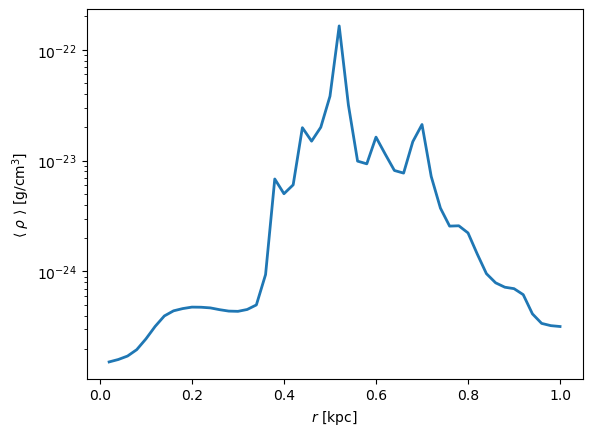

In [128]:
plt.plot(r1d / const.kpc, density1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.yscale('log')

# sim.save_fig("density-1d")


### SFH

Text(0.5, 1.0, '$\\varepsilon_{\\rm SF} = 1.0$ (partfile only)')

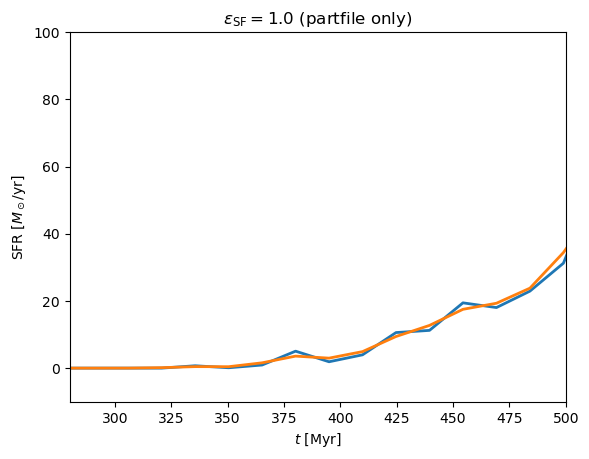

In [27]:
nbins = 20
filter_sigma = 10 * const.Myr

sim = sim

counts, bins = np.histogram(sim.time_starbirth, bins=nbins, weights=sim.mass_star)

star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
star_mass_1d = counts
SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)

plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=2, alpha=1., label=sim.sim_latex)
plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, alpha=1., label=sim.sim_latex)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

plt.xlim(280, 500)
plt.ylim(-10, 100)

plt.title(sim.sim_latex + " (partfile only)")

# plt.annotate(r'$|x|, |y|, |z| < 1~{\rm kpc}$', (290, 140))

# sim.save_fig('SFR-compare')


Text(0.5, 1.0, '$|x|, |y|, |z| < 1~{\\rm kpc}$')

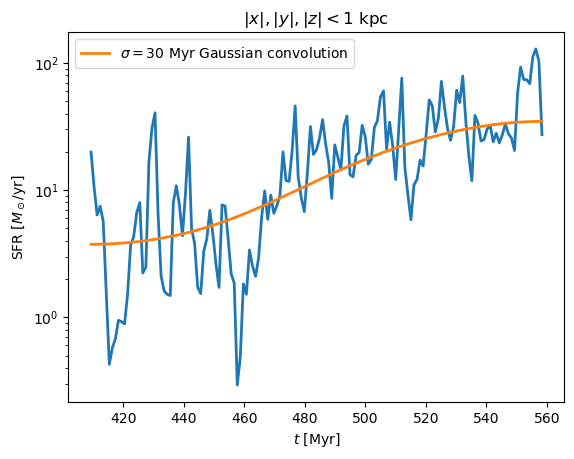

In [28]:
nbins = 150
filter_sigma = 30 * const.Myr
time_range = 150 * const.Myr

counts, bins = np.histogram(sim.time_starbirth, bins=np.linspace(sim.time_now - time_range, sim.time_now, nbins), weights=sim.mass_star)

time_starbirth = bins[:-1] + np.diff(bins)[0]
mass_star = counts
SFR_mass = mass_star / np.diff(bins)[0]

filter_sigma_idx = filter_sigma / np.diff(time_starbirth)[0]
SFR_mass_smoothed = 10**gaussian_filter(np.log10(SFR_mass + epsilon), sigma=filter_sigma_idx)

plt.plot(time_starbirth / const.Myr, SFR_mass / const.M_sol * const.yr, lw=2, color='C0')
plt.plot(time_starbirth / const.Myr, SFR_mass_smoothed / const.M_sol * const.yr, lw=2, color='C1', label=r'$\sigma = %.3g~{\rm Myr}$ Gaussian convolution' % (filter_sigma / const.Myr))

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

plt.yscale('log')

plt.legend()

plt.title(r'$|x|, |y|, |z| < 1~{\rm kpc}$')

# sim.save_fig("SFR")


Text(0.5, 1.0, '$\\sigma = 30~{\\rm Myr}$ Gaussian convolution')

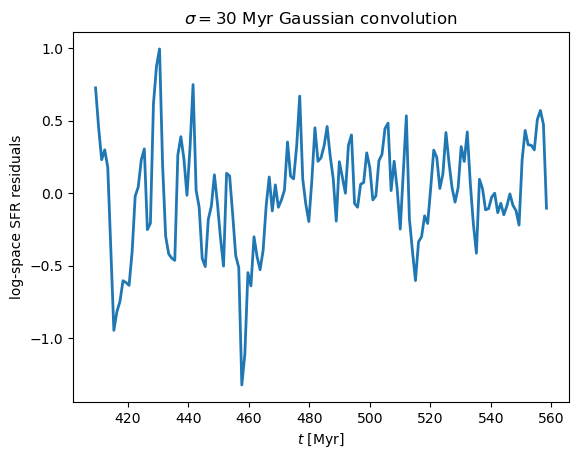

In [31]:
log_SFR_res = np.log10(SFR_mass) - np.log10(SFR_mass_smoothed)

plt.plot(time_starbirth / const.Myr, log_SFR_res, lw=2)

plt.ylabel(r"log-space SFR residuals")
plt.xlabel(r"$t$ [Myr]")

plt.title(r'$\sigma = %.3g~{\rm Myr}$ Gaussian convolution' % (filter_sigma / const.Myr))

# sim.save_fig("SFR-res")


Text(0, 0.5, 'PSD [Myr]')

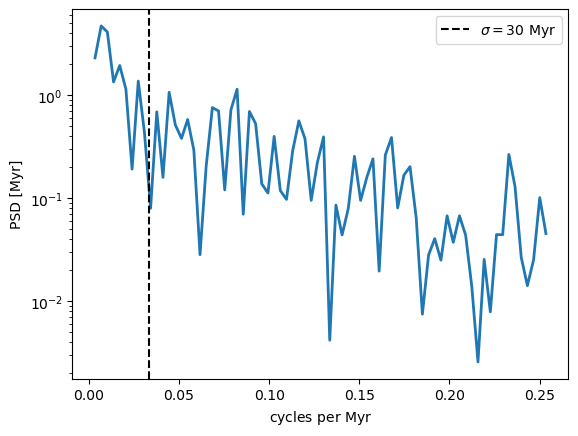

In [34]:
freq_starbirth, log_SFR_res_PSD = welch(log_SFR_res, fs=1/np.diff(star_birth_time)[0], detrend=None, scaling='density', nperseg=256)

plt.plot((freq_starbirth[1:] * const.Myr)**(1), log_SFR_res_PSD[1:] / const.Myr, lw=2)

plt.yscale('log')

plt.axvline(x=(filter_sigma**(-1) * const.Myr), color='black', linestyle='--', label=r'$\sigma = %.3g~{\rm Myr}$' % (filter_sigma / const.Myr))

plt.legend()

plt.xlabel(r"${\rm cycles\ per\ Myr}$")
plt.ylabel(r"PSD [Myr]")

# sim.save_fig("SFR-PSD")


### Summary Statistics

In [142]:
sim.print_stats()

Field                   Max       Min         Mean/Value  Unit
----------------------  --------  --------  ------------  ------
density                 1.31e-18  6.84e-28      9.29e-24  g/cm^3
temperature             3.11e+08  10.1             20100  K
ionization frac         1         0                0.123
metallicity             7.66      0.00149          0.186  Z_sol
mach number             942       0.0496             256
turbulent mach number   344       0.0546            77.9
star age                0.0209    2.64e-07       0.00354  Myr
star part number                                   23200
DM part number                                     10900
contamination fraction                             0.972


### Simulation Comparison

Saved figure as 'density-compare-092720231131.png'


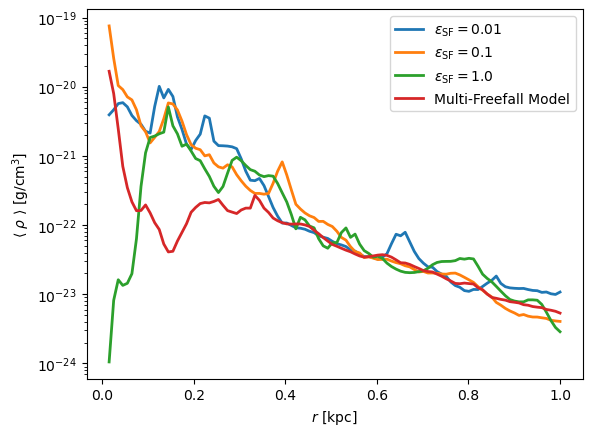

In [54]:
for sim in list_of_sim:
    
    r_1d, density_1d = sim.calc_radial_profile(sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, density_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.legend()

plt.yscale('log')

# save_fig('density-compare')


Saved figure as 'v-turb-compare-092720231130.png'


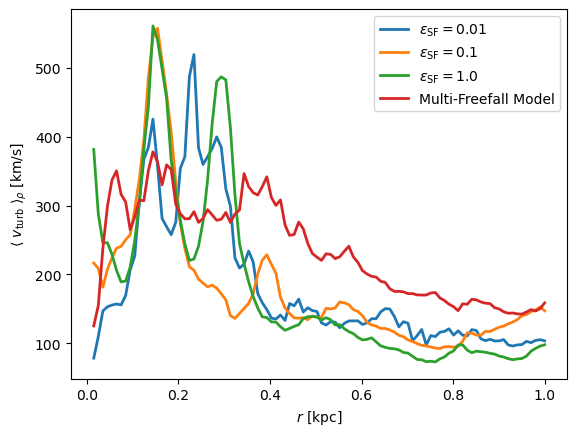

In [53]:
for sim in list_of_sim:
    
    r_1d, turb_energy_1d = sim.calc_radial_profile(sim.turb_energy, weight=sim.density, nbins=100)
    v_turb_1d = np.sqrt(2 * turb_energy_1d)

    plt.plot(r_1d / const.kpc, v_turb_1d / (const.km), lw=2, label=sim.sim_latex)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

plt.legend()

# save_fig('v-turb-compare')


Saved figure as 'temp-compare-092720231130.png'


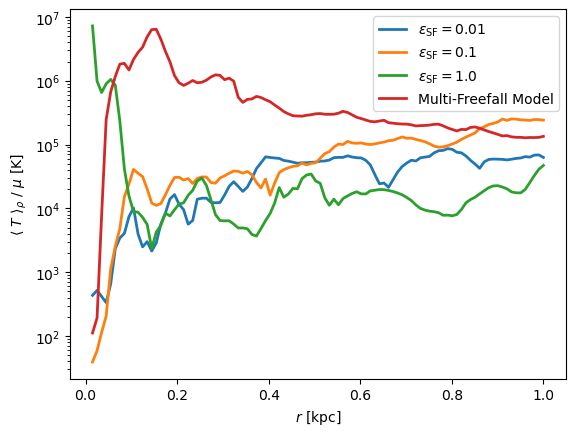

In [52]:
for sim in list_of_sim:
    
    r_1d, temperature_1d = sim.calc_radial_profile(sim.temperature, weight=sim.density, nbins=100)

    plt.plot(r_1d / const.kpc, temperature_1d, lw=2, label=sim.sim_latex)
    
plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.legend()

plt.yscale('log')

# save_fig('temp-compare')


Saved figure as 'SFR-compare-v3-101120230930.png'


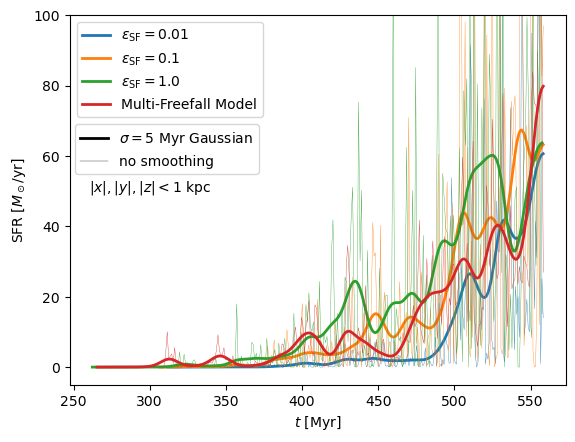

In [50]:
nbins = 300
filter_sigma = 5 * const.Myr

for i, sim in enumerate(list_of_sim):

    counts, bins = np.histogram(sim.time_starbirth, bins=nbins, weights=sim.mass_star)

    star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)
    
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=0.25, alpha=1., color='C%d' % i)
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, label=sim.sim_latex, color='C%d' % i)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

legend1 = plt.legend()
custom_lines = [Line2D([0], [0], color='black', lw=2), Line2D([0], [0], color='black', lw=0.25)]
legend2 = plt.legend(custom_lines, [r'$\sigma=%d~{\rm Myr}$ Gaussian' % (filter_sigma / const.Myr), 'no smoothing'], loc=[0.01, 0.57])
plt.gca().add_artist(legend1)

plt.ylim(-5, 100)

plt.annotate(r'$|x|, |y|, |z| < 1~{\rm kpc}$', (260, 50))

save_fig('SFR-compare-v3')


Text(260, 130, '$|x|, |y|, |z| < 1~{\\rm kpc}$')

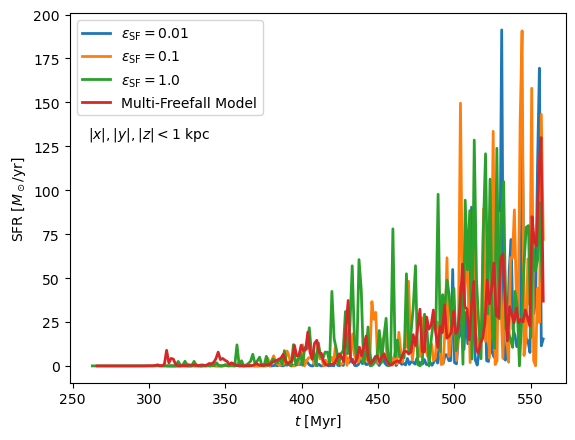

In [52]:
nbins = 200
filter_sigma = 10 * const.Myr

for i, sim in enumerate(list_of_sim):

    counts, bins = np.histogram(sim.time_starbirth, bins=nbins, weights=sim.mass_star)

    star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)
    
    plt.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=2, alpha=1., color='C%d' % i, label=sim.sim_latex)

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

plt.legend()

#plt.ylim(-5, 70)

plt.annotate(r'$|x|, |y|, |z| < 1~{\rm kpc}$', (260, 130))

#save_fig('SFR-compare-v2')


NameError: name 'list_of_sim' is not defined

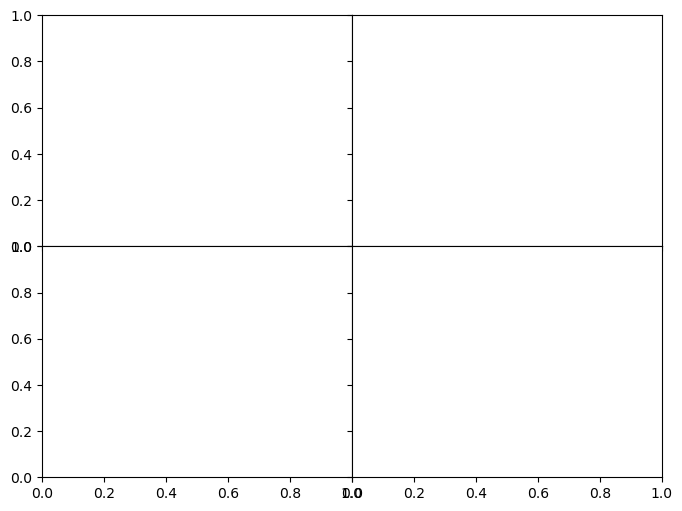

In [18]:
nbins = 200
filter_sigma = 10 * const.Myr

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6))

plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i, sim in enumerate(list_of_sim):

    ax = axs.flatten()[i]
    
    counts, bins = np.histogram(sim.time_starbirth, bins=nbins, weights=sim.mass_star)

    star_birth_time_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birth_time_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)
    
    ax.plot(star_birth_time_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=0.5, alpha=1., color='C%d' % i)
    ax.plot(star_birth_time_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, alpha=1., color='C%d' % i, label=sim.sim_latex)
    
    if i in [0, 2]:
        ax.set_ylabel(r"SFR [$M_\odot / {\rm yr}$]")
    if i in [2, 3]:
        ax.set_xlabel(r"$t$ [Myr]")
        
    ax.set_xlim(280, 570)
    ax.set_ylim(-10, 130)
    
    #ax.legend(loc=2)
    
#plt.suptitle(r'$|x|, |y|, |z| < 1~{\rm kpc}$', y=0.92)

custom_lines1 = [Line2D([0], [0], color='C0', lw=2), Line2D([0], [0], color='C1', lw=2), Line2D([0], [0], color='C2', lw=2), Line2D([0], [0], color='C3', lw=2)]
legend1 = axs[0, 0].legend(custom_lines1, [r'$\varepsilon_{\rm SF} = 0.01$', r'$\varepsilon_{\rm SF} = 0.1$', r'$\varepsilon_{\rm SF} = 1.0$', r'Multi-freefall Model'])

custom_lines2 = [Line2D([0], [0], color='black', lw=2), Line2D([0], [0], color='black', lw=0.5)]
legend2 = axs[0, 0].legend(custom_lines2, [r'$\sigma=%d~{\rm Myr}$ Gaussian' % (filter_sigma / const.Myr), 'no smoothing'], loc=[0.03, 0.32])

axs[0, 0].add_artist(legend1)

axs[0, 0].annotate(r'$|x|, |y|, |z| < 1~{\rm kpc}$', (290, 23))

# save_fig('SFR-compare-v5')
    